In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D,Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import image
import keras
from keras import layers,Model
from math import *

2025-05-05 06:38:24.715776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746427104.958323      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746427105.029610      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#use / after path
train_path='/kaggle/input/butterfly/Butterfly Dataset/train/'
test_path='/kaggle/input/butterfly/Butterfly Dataset/test/'
train=[]
for filename in os.listdir(train_path):
    if filename.endswith('.jpg'):
        img = image.load_img(train_path + filename, target_size=(128, 128))
        img = image.img_to_array(img)
        train.append(img)
train = np.array(train)

test = []
for filename in os.listdir(test_path):
    if filename.endswith('.jpg'):
        img = image.load_img(test_path + filename, target_size=(128, 128))
        img = image.img_to_array(img)
        test.append(img)
test = np.array(test)

In [3]:
x_train = train.astype('float32') / 255
x_test = test.astype('float32') / 255

In [4]:
def show_data(X, n=10,title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

**plt.gray() only affects images that are 2D arrays (grayscale), not 3D RGB images.**

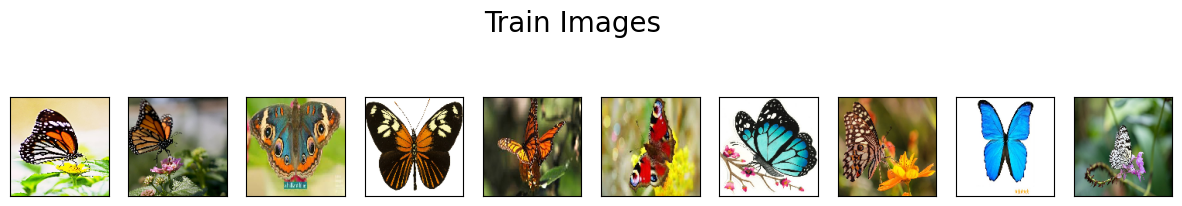

In [5]:
show_data(x_train,title= "Train Images")

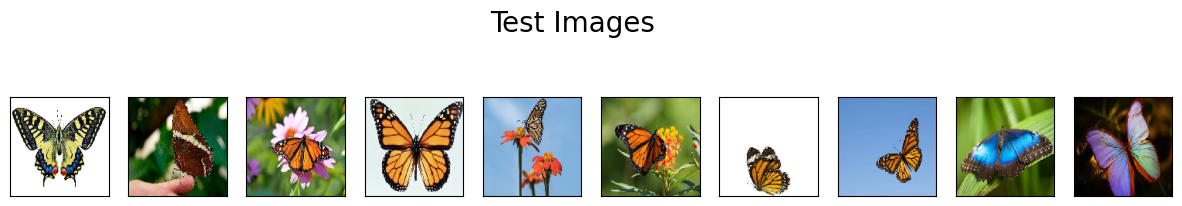

In [6]:
show_data(x_test,title= "Test Images")

In [7]:
input_img = Input(shape=(128, 128, 3))
x = Conv2D(128, kernel_size=(3,3), activation="relu", padding = "same")(input_img)
x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)
x = Conv2D(64, kernel_size=(3,3), activation="relu", padding = "same")(x)
encoded = MaxPooling2D(pool_size = (2,2), padding = "same")(x)
x = Conv2D(64, kernel_size=(3,3), activation="relu", padding = "same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(128, kernel_size=(3,3), activation="relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, kernel_size=(3,3), activation="sigmoid", padding = "same")(x)
# last 3 represents channel inside Conv2D layer

I0000 00:00:1746427119.682420      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746427119.683091      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [8]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ["mean_squared_error"])
print(autoencoder.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 3)         │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,619 (748.51 KB)

 Trainable params: 191,619 (748.51 KB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
hist = autoencoder.fit(x_train,x_train,epochs = 50,batch_size = 4,validation_data = (x_test,x_test),verbose = 1)

Epoch 1/50


I0000 00:00:1746427123.765126      93 service.cc:148] XLA service 0x7c8730005540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746427123.765958      93 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746427123.765978      93 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746427124.116121      93 cuda_dnn.cc:529] Loaded cuDNN version 90300


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6808 - mean_squared_error: 0.0918

I0000 00:00:1746427127.560866      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.6743 - mean_squared_error: 0.0930 - val_loss: 0.6285 - val_mean_squared_error: 0.0728
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5993 - mean_squared_error: 0.0686 - val_loss: 0.5588 - val_mean_squared_error: 0.0451
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5620 - mean_squared_error: 0.0492 - val_loss: 0.5621 - val_mean_squared_error: 0.0441
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5497 - mean_squared_error: 0.0466 - val_loss: 0.5308 - val_mean_squared_error: 0.0326
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4947 - mean_squared_error: 0.0330 - val_loss: 0.5378 - val_mean_squared_error: 0.0368
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5181 - mean_squared_error: 0.0334 - val_loss: 0.4957 - val_mean_squared_error: 0.0201
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5228 - mean_squared_error: 0.0261 - val_loss: 0.4931 - val_mean_squ

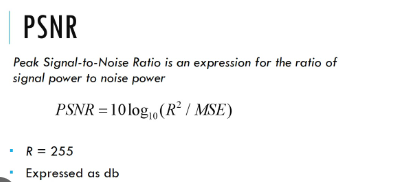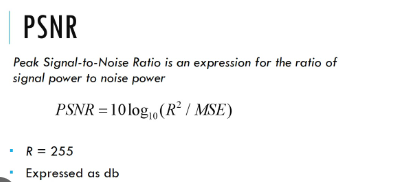
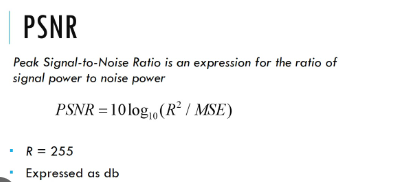
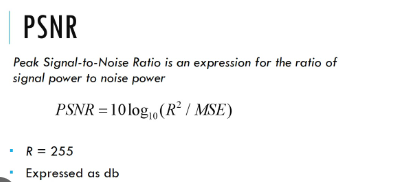

In [10]:
def psnr(original, reconstructed):
    # Ensure images have the same shape and type
    if original.shape != reconstructed.shape or original.dtype != reconstructed.dtype:
        raise ValueError("Original and reconstructed images must have the same shape and type")

    # Calculate the MSE
    mse = np.mean((original - reconstructed) ** 2)

    # Calculate the maximum possible pixel value
    max_pixel = np.max(original)

    # Calculate PSNR
    psnr = 10 * np.log10((max_pixel ** 2) / mse)

    return psnr

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


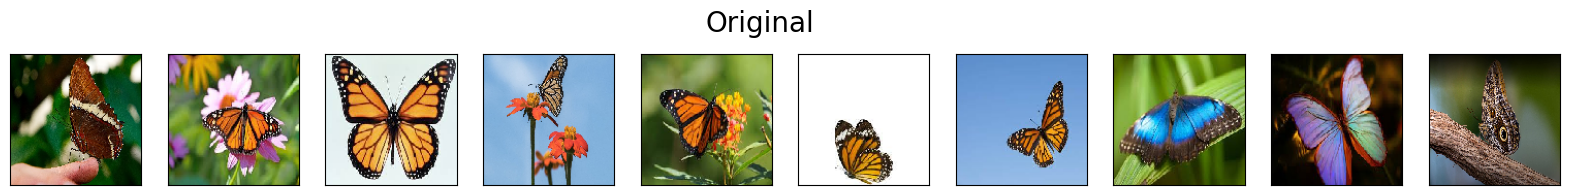

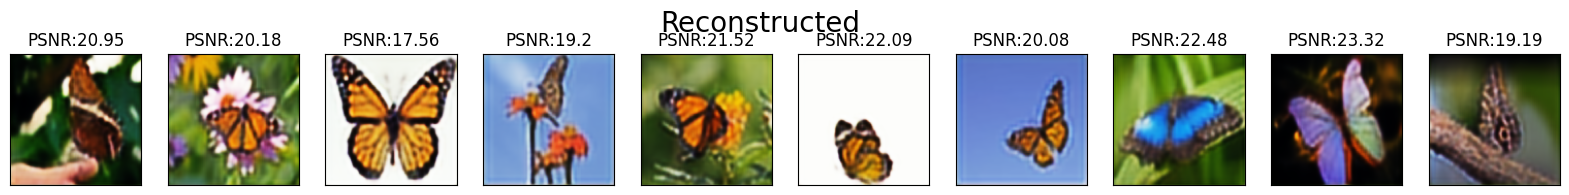

In [11]:
decoded_images = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
        # Display original
        plt.suptitle("Original", fontsize = 20)
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(128,128,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20,4))

for i in range(1, n + 1):
        # Display reconstruction
        plt.suptitle("Reconstructed", fontsize = 20)
        ax = plt.subplot(2, n, i)
        plt.imshow(decoded_images[i].reshape(128,128,3))
        plt.gray()
        plt.title(f"PSNR:{round(psnr(x_test[i],decoded_images[i]),2)}")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()